# Reading the file

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [74]:
ld_scr = pd.read_csv("Leads.csv")
ld_scr.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [75]:
ld_scr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [76]:
ld_scr.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [77]:
#Calculating the null values in the data set
nullpercent = (ld_scr.isnull().sum()/ld_scr.shape[0])*100 
nullpercent

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [80]:
col_drop = [ 'Asymmetrique Profile Score' , 'Asymmetrique Activity Score' , 'Asymmetrique Activity Index', 'Asymmetrique Profile Index' ]

In [81]:
ld_scr['Lead Quality'].value_counts()
#Lead quality should not be dropped as it is an important column which indicats whether a lead is converted or not

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [82]:
#Replacing the null values in Lead Quality with not known

ld_scr['Lead Quality'] = ld_scr['Lead Quality'].replace(np.NAN , 'Not Known')

In [83]:
ld_scr['Lead Quality'].value_counts()

Lead Quality
Not Known            4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [84]:
ld_scr['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [85]:
ld_scr['Lead Profile'] = ld_scr['Lead Profile'].replace(np.NAN , 'Not Known')
ld_scr['Lead Profile'] = ld_scr['Lead Profile'].replace('Select' , 'Not Known')

In [86]:
#Lets drop the columns which are not required
ld_scr.drop(col_drop , axis = 1 , inplace = True)

In [87]:
#lets fill the Null values with 'Not Known' for coulumns with null values more than 15%
nullpercent = (ld_scr.isnull().sum()/ld_scr.shape[0])*100 
nullpercent[nullpercent > 15].index

Index(['Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City'],
      dtype='object')

In [88]:
fillNull_list = ['Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       ]
for i in fillNull_list:
    ld_scr[i].fillna('Not known' , inplace = True)

In [89]:
ld_scr.isnull().sum()/ld_scr.shape[0] *100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [91]:
ld_scr = ld_scr.dropna(axis = 0)

In [92]:
ld_scr.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [108]:
objectlist = ld_scr.loc[: , ld_scr.dtypes == 'object']
objectlist.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

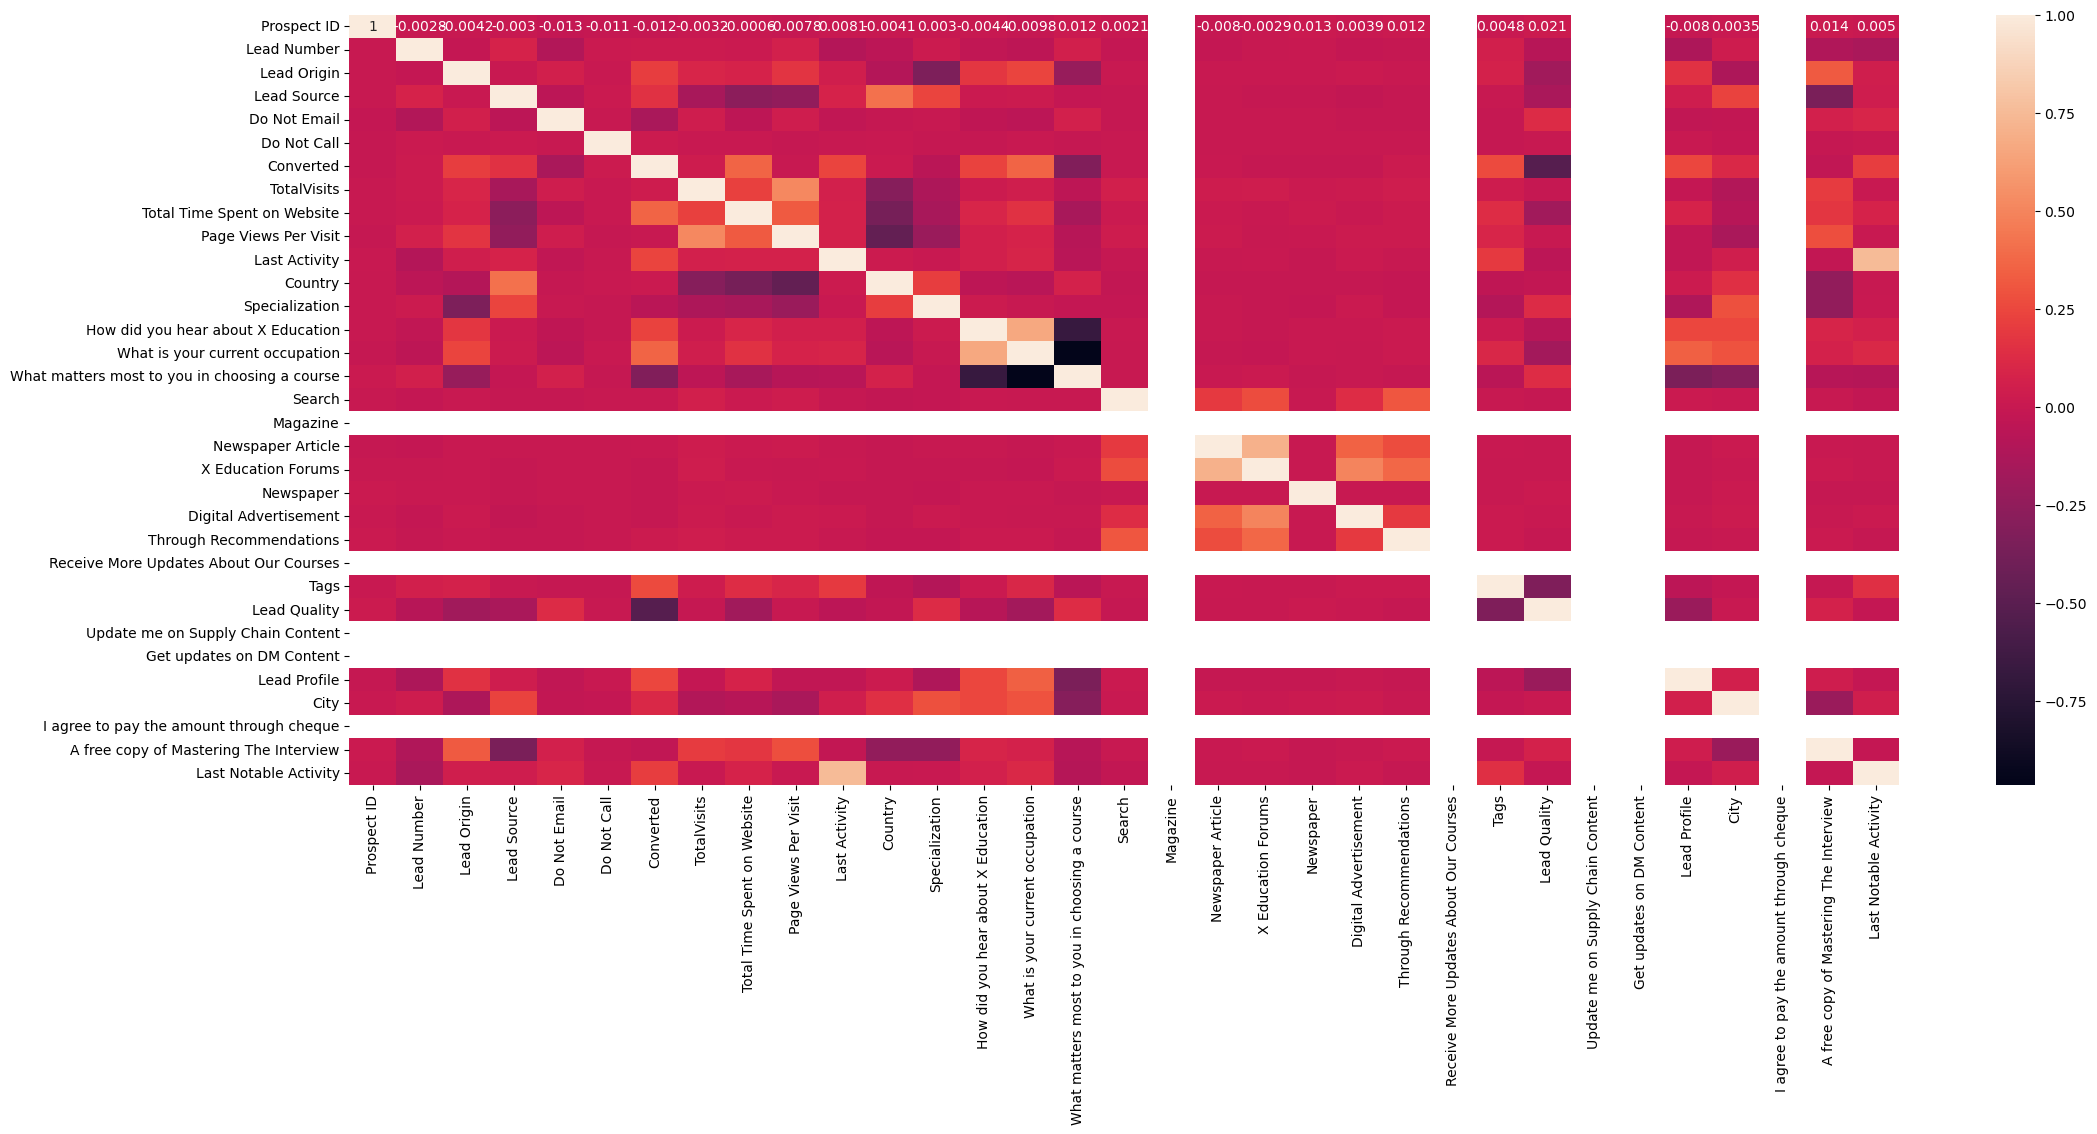

In [138]:
#Lets check the corelation
plt.figure(figsize = (25, 10))
sns.heatmap(ld_scr.corr() , annot = True)
plt.show()

# Preparation of Data

In [120]:
#Creating the dummy values for the categorical variables using get dummies 
objectcol = list(objectlist)
df = pd.get_dummies(ld_scr[objectcol] , dtype = int , drop_first = True)

In [125]:
ld_scr1 = pd.concat([ld_scr , df] , axis = 1)
ld_scr1.shape

(9074, 9288)

In [126]:
#The number of columns has increased significantly , so lets use label encoder
#import libraries 
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for i in objectcol:
    ld_scr[i]= label_encoder.fit_transform(ld_scr[i])

ld_scr.shape

(9074, 33)

In [127]:
ld_scr.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4332,660737,0,6,0,0,0,0.0,0,0.0,...,0,8,1,0,0,2,5,0,0,8
1,1527,660728,0,7,0,0,0,5.0,674,2.5,...,0,15,3,0,0,2,5,0,0,4
2,5034,660727,1,1,0,0,1,2.0,1532,2.0,...,0,20,2,0,0,4,0,0,1,4
3,462,660719,1,1,0,0,0,1.0,305,1.0,...,0,15,4,0,0,2,0,0,0,8
4,1842,660681,1,3,0,0,1,2.0,1428,1.0,...,0,20,2,0,0,2,0,0,0,8


# Splitting data into Train and test

In [128]:
#importing libraries
from sklearn.model_selection import train_test_split

In [148]:
X = ld_scr.drop(['Converted'] , axis = 1)
X.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4332,660737,0,6,0,0,0.0,0,0.0,10,...,0,8,1,0,0,2,5,0,0,8
1,1527,660728,0,7,0,0,5.0,674,2.5,5,...,0,15,3,0,0,2,5,0,0,4
2,5034,660727,1,1,0,0,2.0,1532,2.0,5,...,0,20,2,0,0,4,0,0,1,4
3,462,660719,1,1,0,0,1.0,305,1.0,13,...,0,15,4,0,0,2,0,0,0,8
4,1842,660681,1,3,0,0,2.0,1428,1.0,1,...,0,20,2,0,0,2,0,0,0,8


In [153]:
#Putting the target variable Converted into Y
y = ld_scr['Converted']

In [154]:
#Splitting the data into 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.7 , test_size = 0.3 , random_state = 100 )
print(X_train.shape)
print(y_train.shape)


(6351, 32)
(6351,)


# Feature Scaling

In [155]:
from sklearn.preprocessing import StandardScaler

In [159]:
scaler = StandardScaler()
X_train[[ 'Page Views Per Visit' , 'Total Time Spent on Website'  , 'TotalVisits']] = scaler.fit_transform(X_train[[ 'Page Views Per Visit' , 'Total Time Spent on Website'  , 'TotalVisits']])

In [160]:
X_train.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
3009,2400,630949,1,1,0,0,-0.284595,-0.160255,-0.179666,5,...,0,13,3,0,0,2,0,0,1,4
1012,2503,649355,1,1,1,0,-0.284595,-0.540048,-0.179666,2,...,0,13,3,0,0,2,0,0,0,1
9226,6941,579735,0,6,0,0,-0.671384,-0.888650,-1.132538,12,...,0,15,4,0,0,2,5,0,0,8
4750,5541,614238,1,1,0,0,-0.284595,1.643304,-0.179666,12,...,0,13,3,0,0,2,2,0,0,12
7987,6252,588625,1,1,0,0,0.295588,2.017593,0.058552,12,...,0,10,4,0,0,2,3,0,0,8


# Building the model

In [139]:
import statsmodels.api as sm

In [163]:
#Logistic Regression model

logscr1 = sm.GLM(y_train,(sm.add_constant(X_train)) , family = sm.families.Binomial())
logscr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2322.4
Date:                Sun, 21 Jul 2024   Deviance:                       4644.8
Time:                        00:04:08   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4521
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.4359      1.232     -4.413      0.000      -7.850      -3.022
Prospect ID                                     -6.6e-06   1.41e-05     -0.467      0.641   -3.43e-05    2.11e-05
Lead Number                                    2.606e-06   1.67e-06      1.565      0.118   -6.58e-07    5.87e-06
Lead Origin                                       0.4246      0.071      6.012      0.000       0.286       0.563
Lead Source                                       0.1228      0.015      8.356      0.000       0.094       0.152
Do Not Email                                     -1.5136      0.183     -8.288      0.000      -1.871      -1.156
Do Not Call                                      21.2426   1.91e+04      0.001      0.999   -3.73e+04    3.74e+04
TotalVisits                                       0.1022      0.038      2.659      0.008       0.027       0.178
Total Time Spent on Website                       1.0857      0.043     25.069      0.000       1.001       1.171
Page Views Per Visit                             -0.3506      0.048     -7.231      0.000      -0.446      -0.256
Last Activity                                     0.1197      0.017      6.868      0.000       0.086       0.154
Country                                           0.0551      0.009      5.825      0.000       0.037       0.074
Specialization                                   -0.0073      0.008     -0.858      0.391      -0.024       0.009
How did you hear about X Education                0.0412      0.023      1.785      0.074      -0.004       0.086
What is your current occupation                   0.4005      0.098      4.102      0.000       0.209       0.592
What matters most to you in choosing a course     0.1336      0.157      0.850      0.395      -0.174       0.442
Search                                           -1.0283      1.073     -0.958      0.338      -3.131       1.075
Magazine                                      -2.615e-11   2.74e-07  -9.53e-05      1.000   -5.38e-07    5.38e-07
Newspaper Article                                20.7631   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                              -41.4226   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                       -21.8062   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                            -0.8130      1.936     -0.420      0.675      -4.608       2.982
Through Recommendations                           1.9616      2.639      0.743      0.457      -3.211       7.134
Receive More Updates About Our Courses         5.317e-12   4.16e-09      0.001      0.999   -8.14e-09    8.15e-09
Tags 

There are a lot of features whose P  value is quite high , so those should be eliminated